In [1]:
import ipywidgets
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib import rcParams
import random as rd
import warnings

from collections import Counter

## Recreate Kirami Code

In [2]:
from generate_homophilic_graph_symmetric import homophilic_ba_graph

### Degree distirbution (histogram)

In [ ]:
def plot_single_graph_degree(G, title="Log–Log Degree Distribution"):
    """
    Plot the degree distribution of a single homophilic BA graph.

    Parameters:
        G (networkx.Graph): The graph to plot.
        title (str): Plot title.
    """
    degrees = dict(G.degree())
    red_degrees = [degrees[n] for n in G.nodes if G.nodes[n]['color'] == 'red']
    blue_degrees = [degrees[n] for n in G.nodes if G.nodes[n]['color'] == 'blue']

    red_dist = Counter(red_degrees)
    blue_dist = Counter(blue_degrees)

    plt.figure(figsize=(8, 5))
    plt.scatter(*zip(*sorted(blue_dist.items())), label='Majority (blue)', color='blue', alpha=0.7)
    plt.scatter(*zip(*sorted(red_dist.items())), label='Minority (orange)', color='orange', alpha=0.7)

    plt.xlabel("Degree (log)")
    plt.ylabel("Number of Nodes (log)")
    plt.xscale("log")
    plt.yscale("log")
    plt.title(title)
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

In [47]:

from collections import Counter, defaultdict
def get_degree_counts(G):
    degrees = dict(G.degree())
    red_degrees = [degrees[n] for n in G.nodes if G.nodes[n]['color'] == 'red']
    blue_degrees = [degrees[n] for n in G.nodes if G.nodes[n]['color'] == 'blue']
    return Counter(red_degrees), Counter(blue_degrees)

def average_degree_distributions(graphs):
    red_totals = defaultdict(list)
    blue_totals = defaultdict(list)

    for G in graphs:
        red_dist, blue_dist = get_degree_counts(G)

        for deg, count in red_dist.items():
            red_totals[deg].append(count)

        for deg, count in blue_dist.items():
            blue_totals[deg].append(count)

    # Average the counts
    avg_red = {deg: np.mean(counts) for deg, counts in red_totals.items()}
    avg_blue = {deg: np.mean(counts) for deg, counts in blue_totals.items()}

    return avg_red, avg_blue

def plot_avg_distribution(avg_red, avg_blue):
    plt.figure(figsize=(8, 5))
    plt.scatter(*zip(*sorted(blue_dist.items())), label='Majority (blue)', color='blue', alpha=0.7)
    plt.scatter(*zip(*sorted(red_dist.items())), label='Minority (orange)', color='orange', alpha=0.7)
    plt.xlabel("Degree (log)")
    plt.ylabel("Avg Number of Nodes (log)")
    plt.xscale("log")
    plt.yscale("log")
    plt.title("Average Log–Log Degree Distribution (5 Graphs)")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

### Degree distribution (frequency)

In [ ]:
def plot_frequency_distribution(G):
    degrees = dict(G.degree())
    red_degrees = [degrees[n] for n in G.nodes if G.nodes[n]['color'] == 'red']
    blue_degrees = [degrees[n] for n in G.nodes if G.nodes[n]['color'] == 'blue']

    red_dist = Counter(red_degrees)
    blue_dist = Counter(blue_degrees)

    total_red = len(red_degrees)
    total_blue = len(blue_degrees)
    total = total_red+total_blue

    red_freq = {k: v / total for k, v in red_dist.items()}
    blue_freq = {k: v / total for k, v in blue_dist.items()}

    plt.figure(figsize=(8, 5))
    plt.scatter(*zip(*sorted(blue_freq.items())), label='Majority (blue)', color='blue', alpha=0.7)
    plt.scatter(*zip(*sorted(red_freq.items())), label='Minority (orange)', color='orange', alpha=0.7)
    plt.xlabel("Degree (log)")
    plt.ylabel("Frequency (log)")
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()


In [50]:

def average_frequency_distribution(graphs):
    red_freq = defaultdict(list)
    blue_freq = defaultdict(list)

    for G in graphs:
        degrees = dict(G.degree())

        red_nodes = [n for n in G.nodes if G.nodes[n]["color"] == "red"]
        blue_nodes = [n for n in G.nodes if G.nodes[n]["color"] == "blue"]

        red_degrees = [degrees[n] for n in red_nodes]
        blue_degrees = [degrees[n] for n in blue_nodes]

        red_dist = Counter(red_degrees)
        blue_dist = Counter(blue_degrees)

        red_total = len(red_nodes)
        blue_total = len(blue_nodes)
        total = red_total  + blue_total 

        for k, v in red_dist.items():
            red_freq[k].append(v / total)
        for k, v in blue_dist.items():
            blue_freq[k].append(v / total)

    # Average frequencies across all graphs
    avg_red = {k: np.mean(v) for k, v in red_freq.items()}
    avg_blue = {k: np.mean(v) for k, v in blue_freq.items()}

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(*zip(*sorted(avg_blue.items())), label='Majority (blue)', color='blue', alpha=0.7)
    plt.scatter(*zip(*sorted(avg_red.items())), label='Minority (orange)', color='orange', alpha=0.7)

    plt.xlabel("Degree (log)")
    plt.ylabel("Frequency (log)")
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()


## Homophily =0.5

In [7]:
graphs5 = []

for seed in range(10,15):
    G = homophilic_ba_graph(N=5000, m=2, minority_fraction=0.2, homophily=0.5, seed=seed)
    graphs5.append(G)

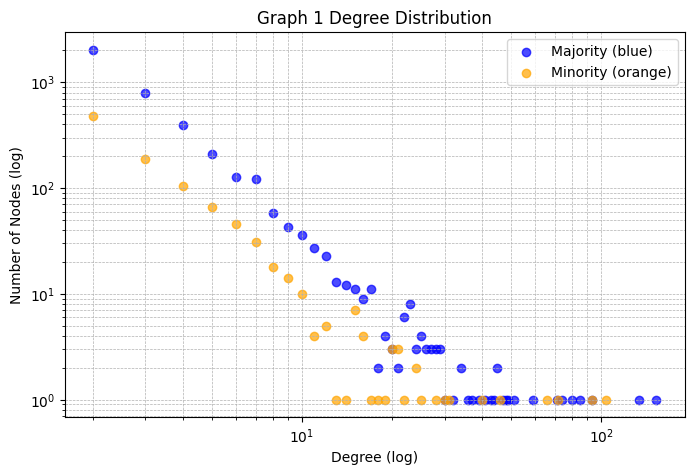

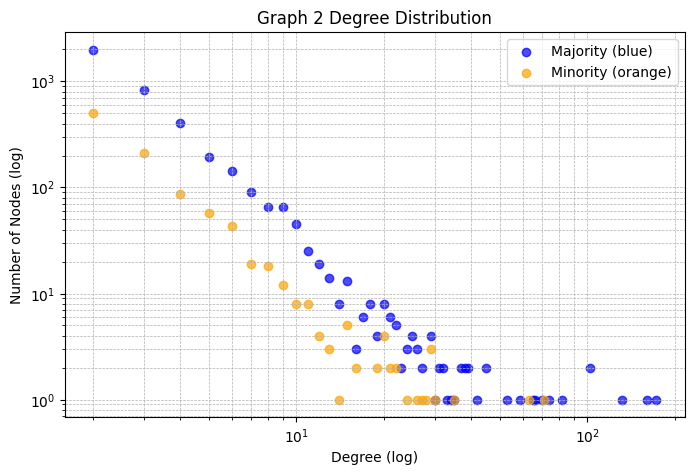

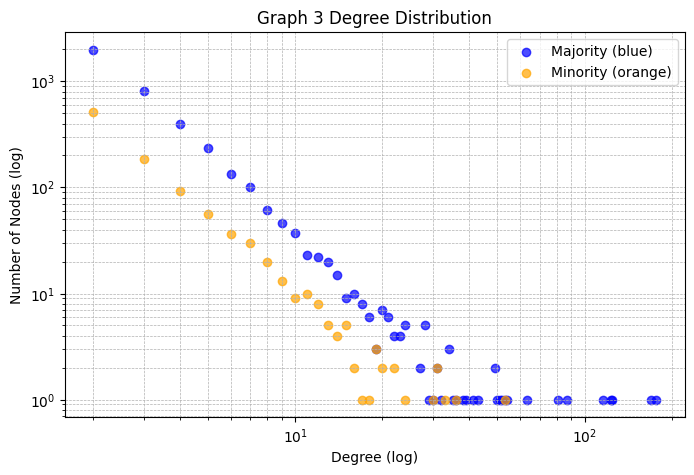

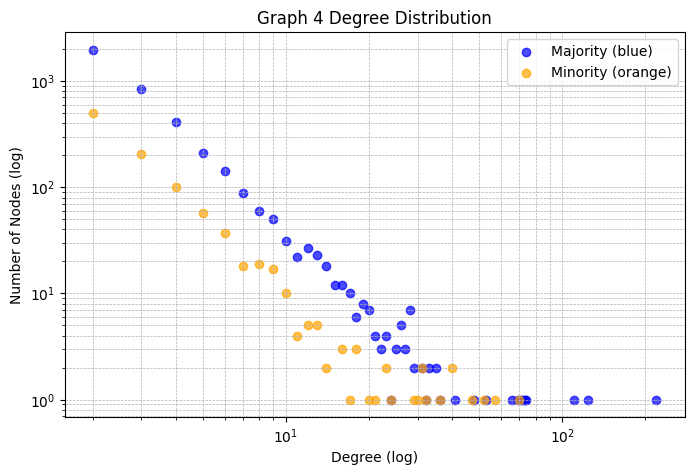

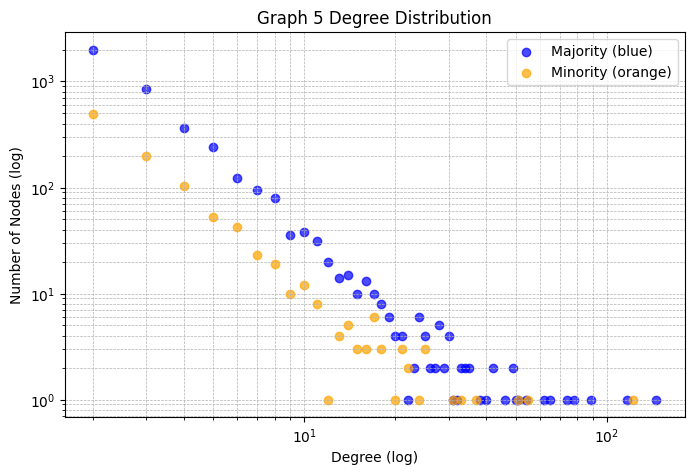

In [20]:
for i, G in enumerate(graphs5):
    plot_single_graph_degree(G, title=f"Graph {i+1} Degree Distribution")

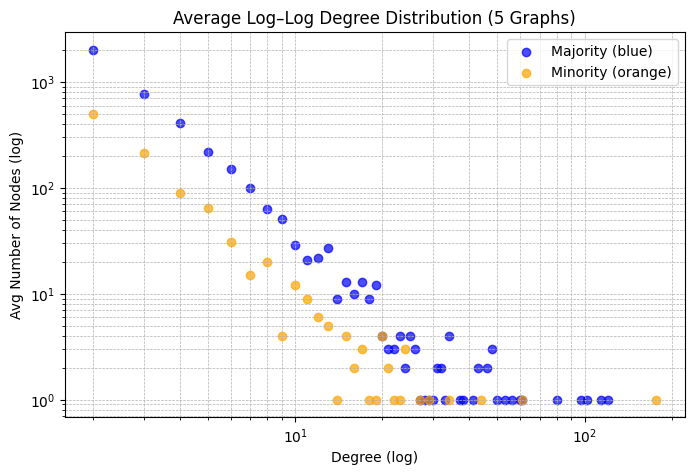

In [22]:
avg_red, avg_blue = average_degree_distributions(graphs)
plot_avg_distribution(avg_red, avg_blue)

## Homophily = 0.0

In [23]:
graphs = []

for seed in range(5):
    G = homophilic_ba_graph(N=5000, m=2, minority_fraction=0.2, homophily=0.0, seed=seed)
    graphs.append(G)

In [27]:
graphs0 = graphs

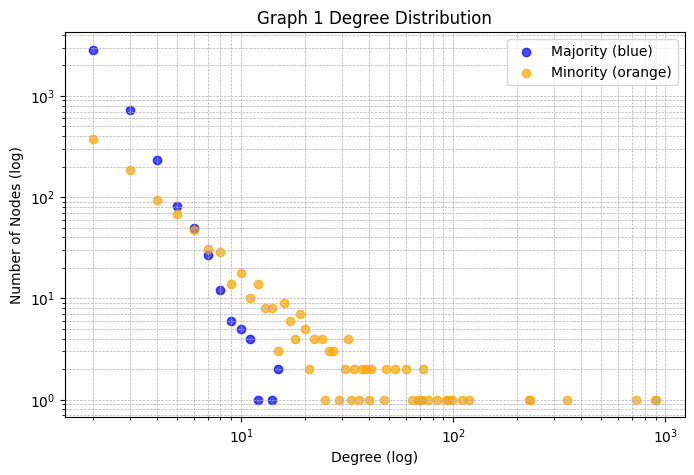

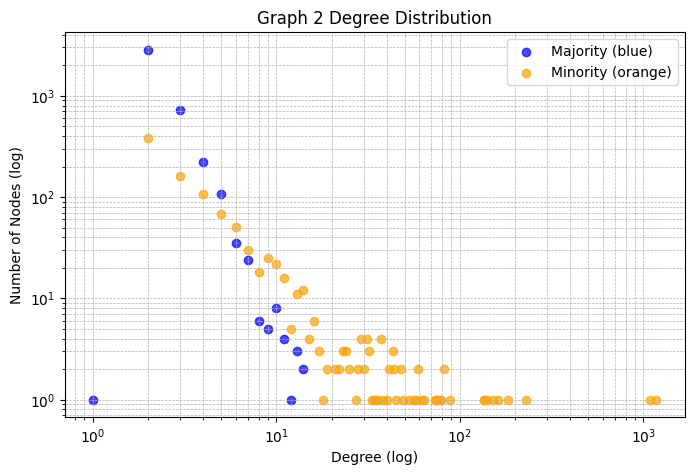

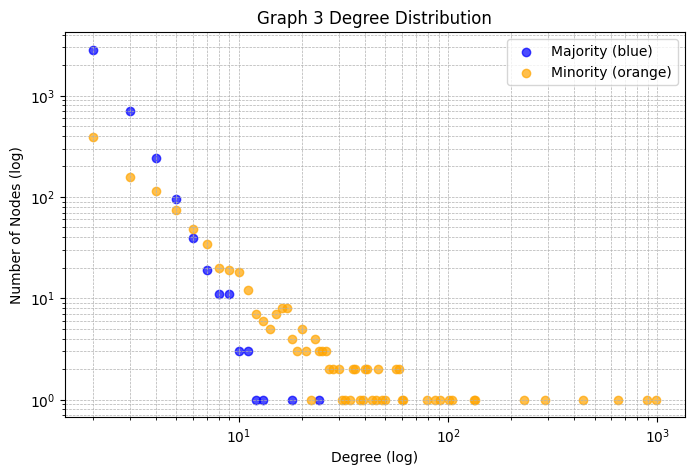

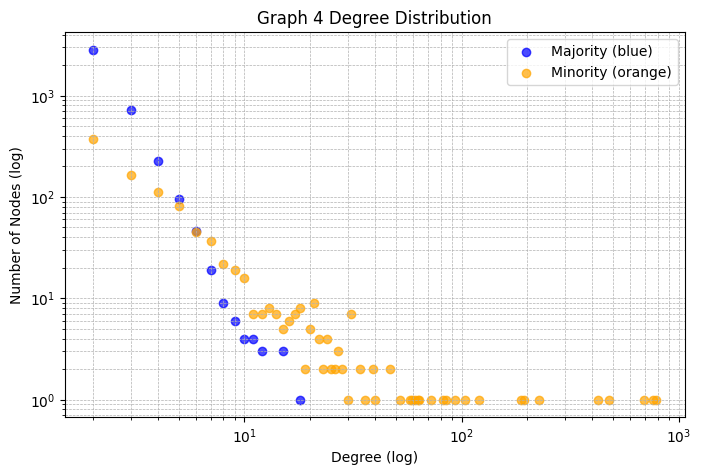

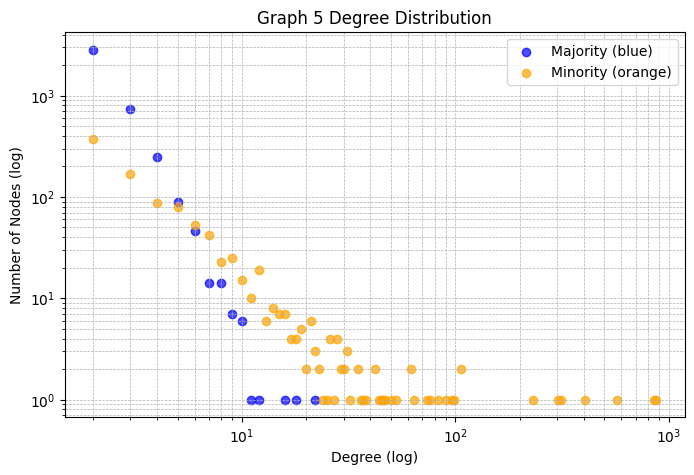

In [28]:
for i, G in enumerate(graphs0):
    plot_single_graph_degree(G, title=f"Graph {i+1} Degree Distribution")

In [43]:


def plot_frequency_distribution(G):
    degrees = dict(G.degree())
    red_degrees = [degrees[n] for n in G.nodes if G.nodes[n]['color'] == 'red']
    blue_degrees = [degrees[n] for n in G.nodes if G.nodes[n]['color'] == 'blue']

    red_dist = Counter(red_degrees)
    blue_dist = Counter(blue_degrees)

    total_red = len(red_degrees)
    total_blue = len(blue_degrees)
    total = total_red+total_blue

    red_freq = {k: v / total for k, v in red_dist.items()}
    blue_freq = {k: v / total for k, v in blue_dist.items()}

    plt.figure(figsize=(8, 5))
    plt.scatter(*zip(*sorted(blue_freq.items())), label='Majority (blue)', color='blue', alpha=0.7)
    plt.scatter(*zip(*sorted(red_freq.items())), label='Minority (orange)', color='orange', alpha=0.7)
    plt.xlabel("Degree (log)")
    plt.ylabel("Frequency (log)")
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()


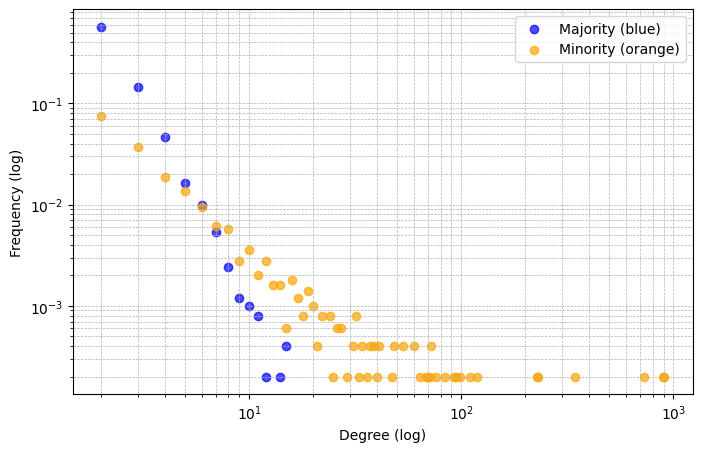

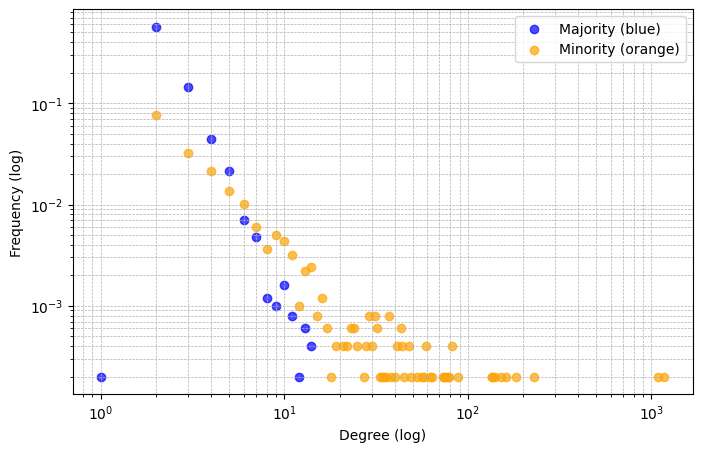

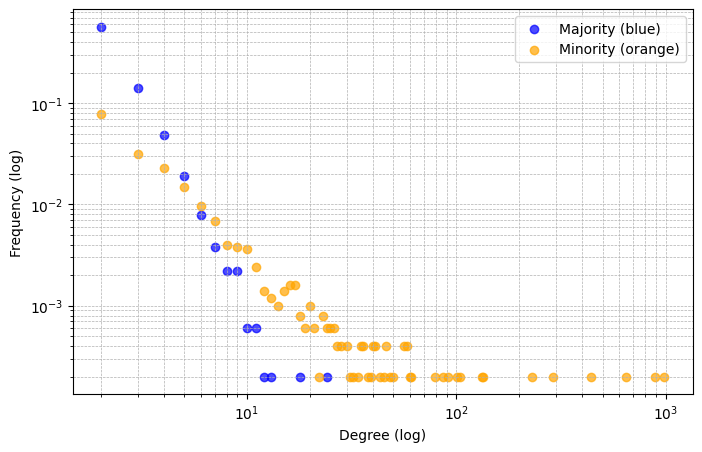

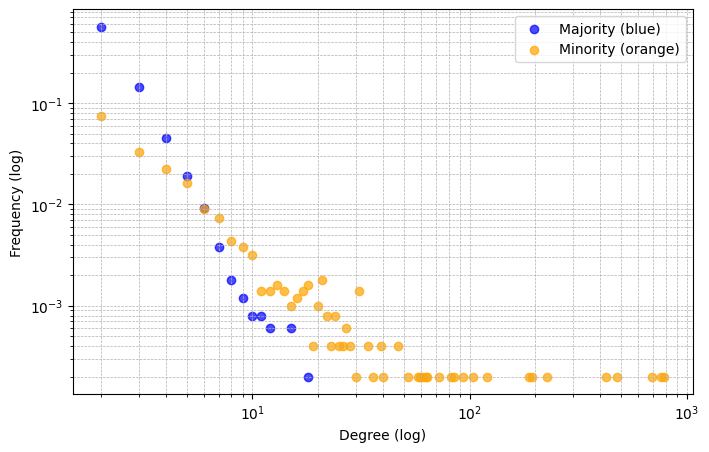

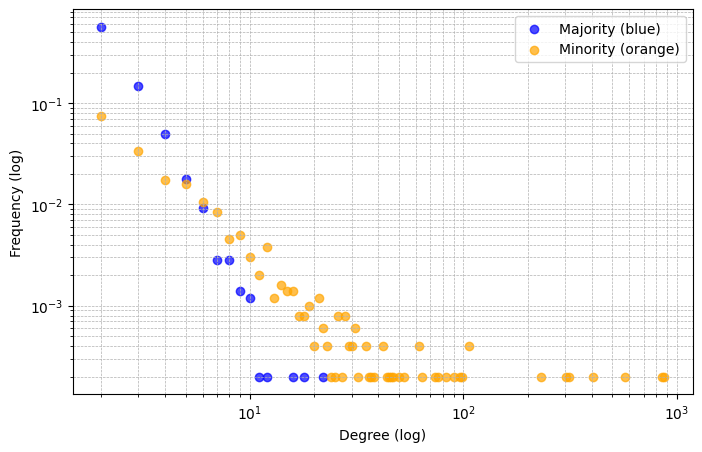

In [44]:
for i, G in enumerate(graphs0):

    plot_frequency_distribution(G)


## Average

In [32]:
def plot_average_degree_distribution(graphs):
    total_red_dist = defaultdict(int)
    total_blue_dist = defaultdict(int)

    for G in graphs:
        degrees = dict(G.degree())
        red_degrees = [degrees[n] for n in G.nodes if G.nodes[n]['color'] == 'red']
        blue_degrees = [degrees[n] for n in G.nodes if G.nodes[n]['color'] == 'blue']
        
        red_dist = Counter(red_degrees)
        blue_dist = Counter(blue_degrees)

        for k, v in red_dist.items():
            total_red_dist[k] += v
        for k, v in blue_dist.items():
            total_blue_dist[k] += v

    num_graphs = len(graphs)
    avg_red_dist = {k: v / num_graphs for k, v in total_red_dist.items()}
    avg_blue_dist = {k: v / num_graphs for k, v in total_blue_dist.items()}

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(*zip(*sorted(avg_blue_dist.items())), label='Majority (blue)', alpha=0.7, color='blue')
    plt.scatter(*zip(*sorted(avg_red_dist.items())), label='Minority (orange)', alpha=0.7, color='orange')
    plt.xlabel("Degree (log)")
    plt.ylabel("Average Number of Nodes (log)")
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

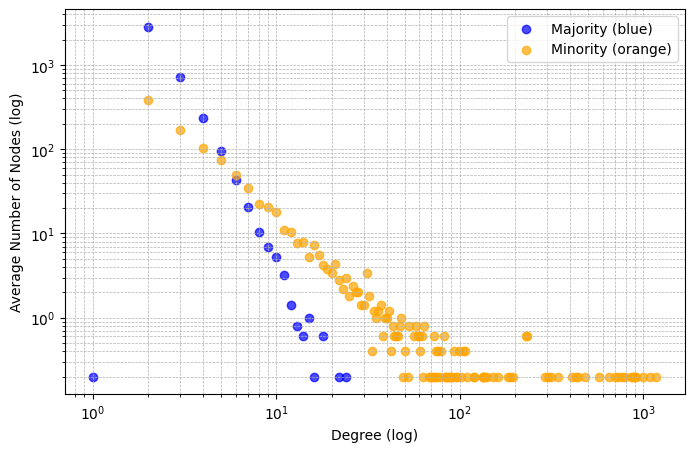

In [33]:
plot_average_degree_distribution(graphs0)

In [45]:

def average_frequency_distribution(graphs):
    red_freq = defaultdict(list)
    blue_freq = defaultdict(list)

    for G in graphs:
        degrees = dict(G.degree())

        red_nodes = [n for n in G.nodes if G.nodes[n]["color"] == "red"]
        blue_nodes = [n for n in G.nodes if G.nodes[n]["color"] == "blue"]

        red_degrees = [degrees[n] for n in red_nodes]
        blue_degrees = [degrees[n] for n in blue_nodes]

        red_dist = Counter(red_degrees)
        blue_dist = Counter(blue_degrees)

        red_total = len(red_nodes)
        blue_total = len(blue_nodes)
        total = red_total  + blue_total 

        for k, v in red_dist.items():
            red_freq[k].append(v / total)
        for k, v in blue_dist.items():
            blue_freq[k].append(v / total)

    # Average frequencies across all graphs
    avg_red = {k: np.mean(v) for k, v in red_freq.items()}
    avg_blue = {k: np.mean(v) for k, v in blue_freq.items()}

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(*zip(*sorted(avg_blue.items())), label='Majority (blue)', color='blue', alpha=0.7)
    plt.scatter(*zip(*sorted(avg_red.items())), label='Minority (orange)', color='orange', alpha=0.7)

    plt.xlabel("Degree (log)")
    plt.ylabel("Frequency (log)")
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()


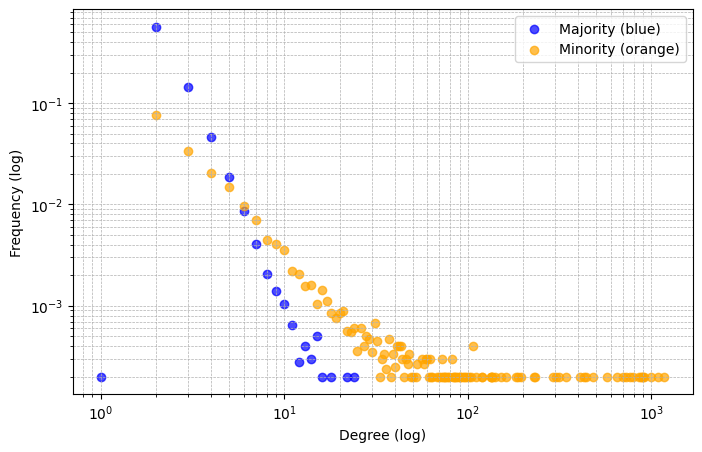

In [46]:
average_frequency_distribution(graphs0)